In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("benchmark_dream.txt")


def visualize_numerical(test_name, title):
    # Provided data
    data = df[df["Test_Name"] == test_name]
    data = data.drop("Test_Name", axis=1)

    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # Adjusted size for clarity
    fig.suptitle(title)

    # Function to set y-axis limits
    def set_limits(ax, series):
        margin = series.min() / 10
        lower_bound = max(0, series.min() - margin)
        upper_bound = series.max() + (series.max() * 0.1)
        ax.set_ylim(lower_bound, upper_bound)  # Adding 10% margin above max

    # Subplot for RMSE Mean
    axs[0].plot(data["Test_Case"], data["RMSE_Mean"], marker="o", color="skyblue")
    axs[0].set_title("RMSE Mean")
    axs[0].set_xlabel("Test Case")
    axs[0].set_ylabel("RMSE Mean")
    set_limits(axs[0], data["RMSE_Mean"])

    # Subplot for MAE Mean
    axs[1].plot(data["Test_Case"], data["MAE_Mean"], marker="o", color="mediumvioletred")
    axs[1].set_title("MAE Mean")
    axs[1].set_xlabel("Test Case")
    axs[1].set_ylabel("MAE Mean")
    set_limits(axs[1], data["MAE_Mean"])

    # Subplot for Computation Time
    axs[2].plot(data["Test_Case"], data["Time"], marker="o", color="yellowgreen")
    axs[2].set_title("Computation Time")
    axs[2].set_xlabel("Test Case")
    axs[2].set_ylabel("Time (Seconds)")
    set_limits(axs[2], data["Time"])

    # Adjust layout to prevent overlap of subplots
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show the plot
    plt.show()


def visualize_categorical(test_name, title):
    # Data preparation
    data = df[df["Test_Name"] == test_name]
    data = data.drop("Test_Name", axis=1)

    def set_limits(ax, series):
        margin = series.min() / 10
        lower_bound = max(0, series.min() - margin)
        upper_bound = series.max() + (series.max() * 0.02)
        ax.set_ylim(lower_bound, upper_bound)  # Adding 10% margin above max

    data_T = {
        "Configuration": data["Test_Case"].tolist(),
        "RMSE_Mean": data["RMSE_Mean"].astype(float).tolist(),
        "MAE_Mean": data["MAE_Mean"].astype(float).tolist(),
        "Time": data["Time"].astype(float).tolist(),
    }

    data = pd.DataFrame(data_T)

    # Set up the matplotlib figure
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))  # Adjust the size as needed
    axs = axs.flatten()  # Flatten the array of axes for easier iteration
    fig.suptitle(title)

    # Plot each metric
    metrics = ["RMSE_Mean", "MAE_Mean", "Time"]
    colors = ["skyblue", "mediumvioletred", "yellowgreen"]

    for ax, metric, color in zip(axs, metrics, colors):
        data.plot(kind="bar", x="Configuration", y=metric, ax=ax, color=color, legend=False)
        ax.set_title(metric)
        ax.set_xlabel("Configuration")
        ax.set_ylabel(metric)
        set_limits(ax, data[metric])  # Set the limits for each axis

    # Remove empty subplots if there are any
    for i in range(len(metrics), len(axs)):
        fig.delaxes(axs[i])

    fig.tight_layout(pad=3.0)  # Adjust spacing between plots
    plt.show()

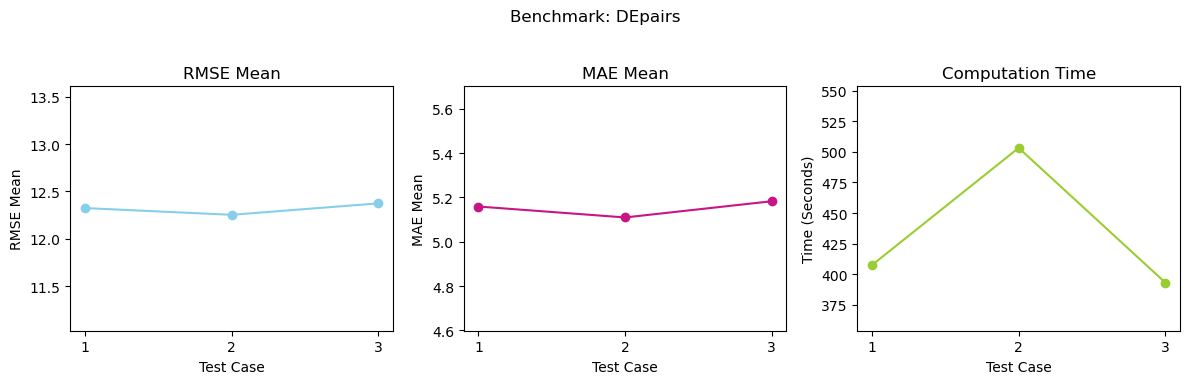

In [3]:
visualize_numerical("DEpairs", "Benchmark: DEpairs")

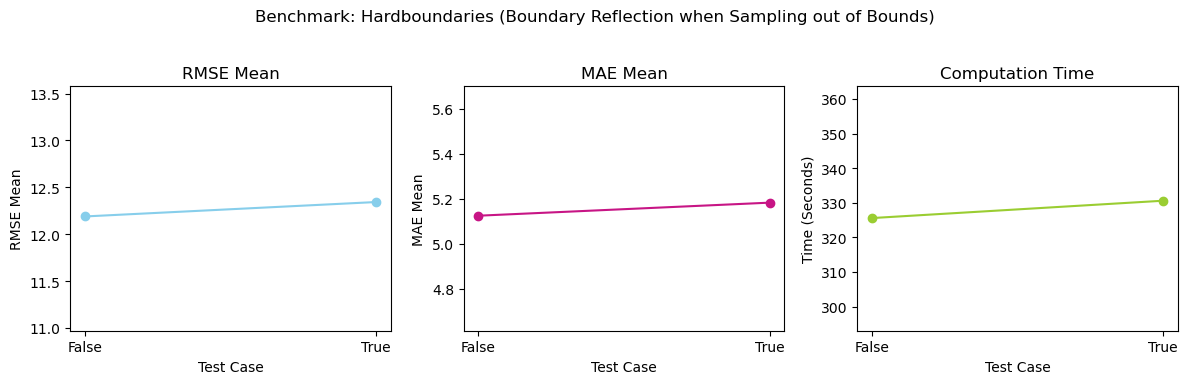

In [4]:
visualize_numerical(
    "hardboundaries",
    "Benchmark: Hardboundaries (Boundary Reflection when Sampling out of Bounds)",
)

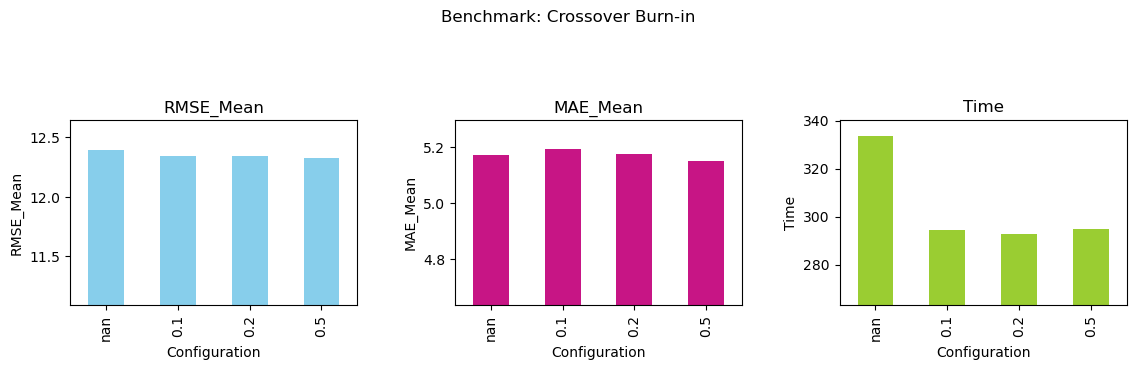

In [5]:
visualize_categorical("crossover_burnin", "Benchmark: Crossover Burn-in")

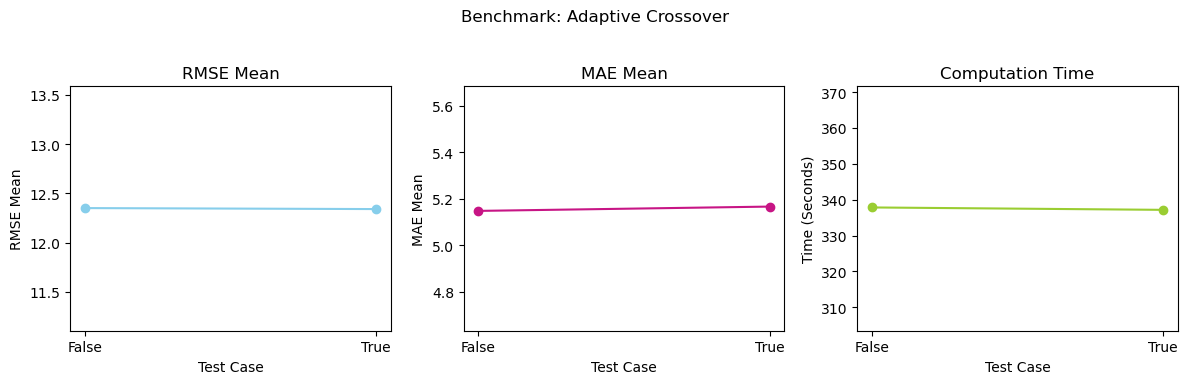

In [6]:
visualize_numerical("adapt_crossover", "Benchmark: Adaptive Crossover")

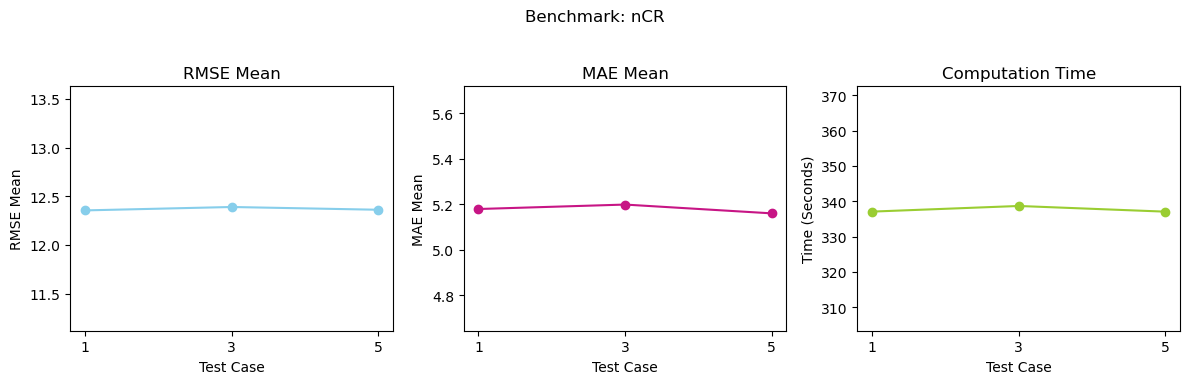

In [7]:
visualize_numerical("nCR", "Benchmark: nCR")

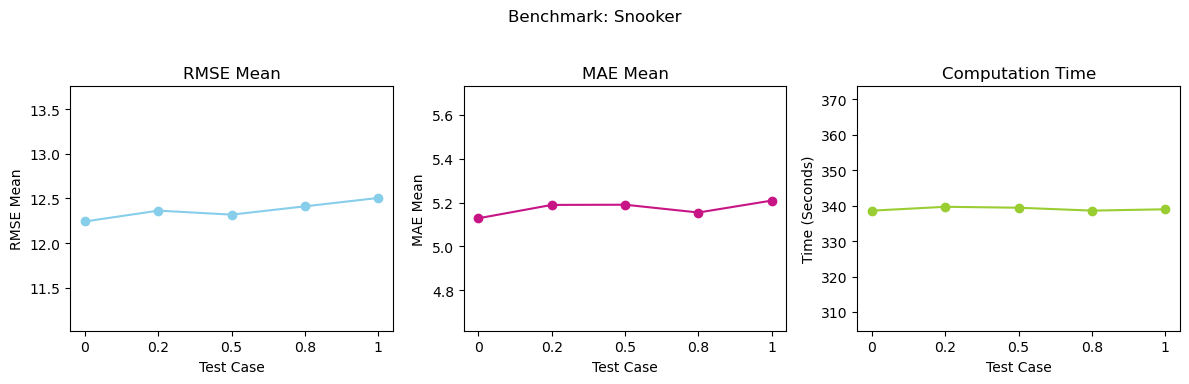

In [8]:
visualize_numerical("snooker", "Benchmark: Snooker")

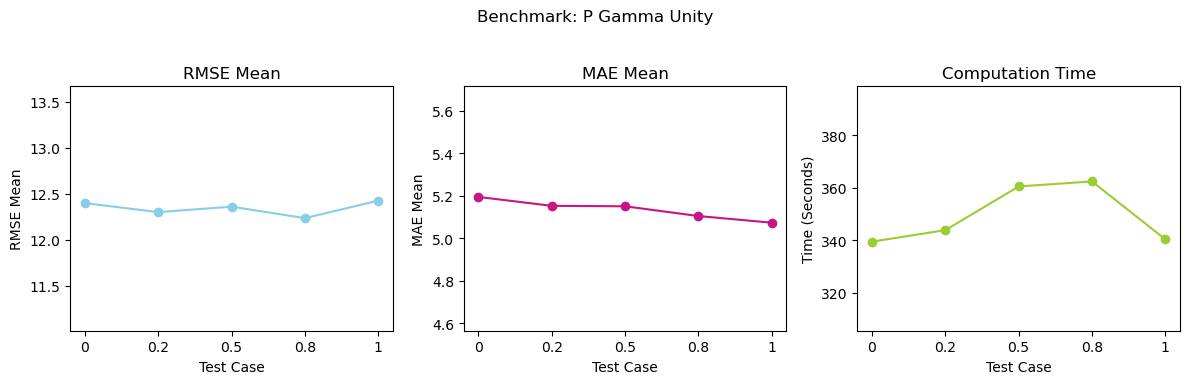

In [9]:
visualize_numerical("p_gamma_unity", "Benchmark: P Gamma Unity")

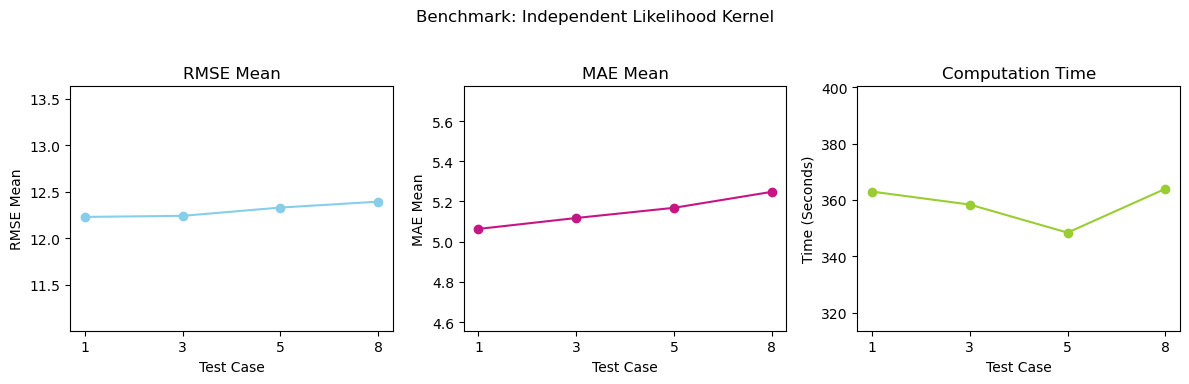

In [10]:
visualize_numerical(
    "sensitivity_likelihood_independent", "Benchmark: Independent Likelihood Kernel"
)

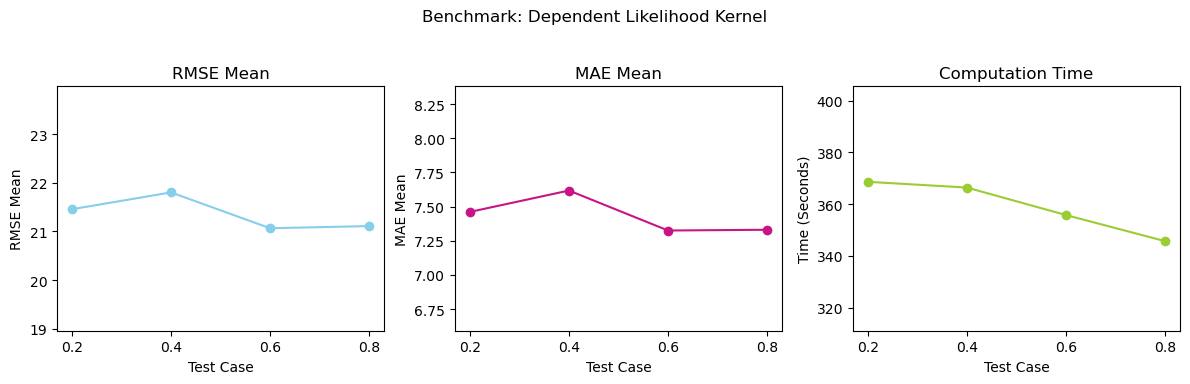

In [11]:
visualize_numerical(
    "sensitivity_likelihood_dependent", "Benchmark: Dependent Likelihood Kernel"
)

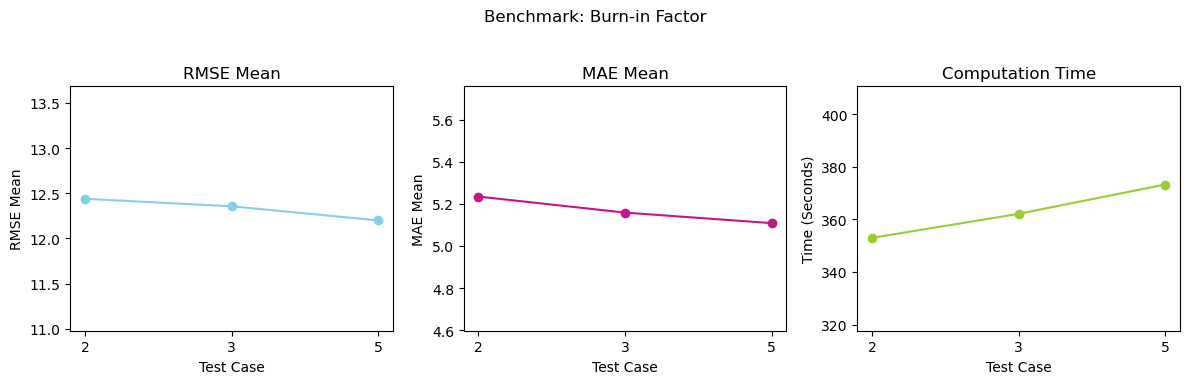

In [12]:
visualize_numerical("burnin_factor", "Benchmark: Burn-in Factor")

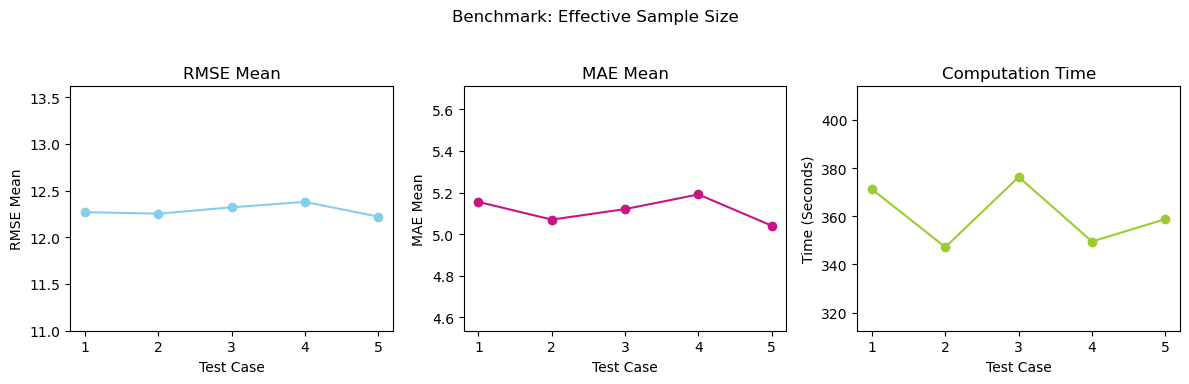

In [13]:
visualize_numerical("effective_sample_size", "Benchmark: Effective Sample Size")

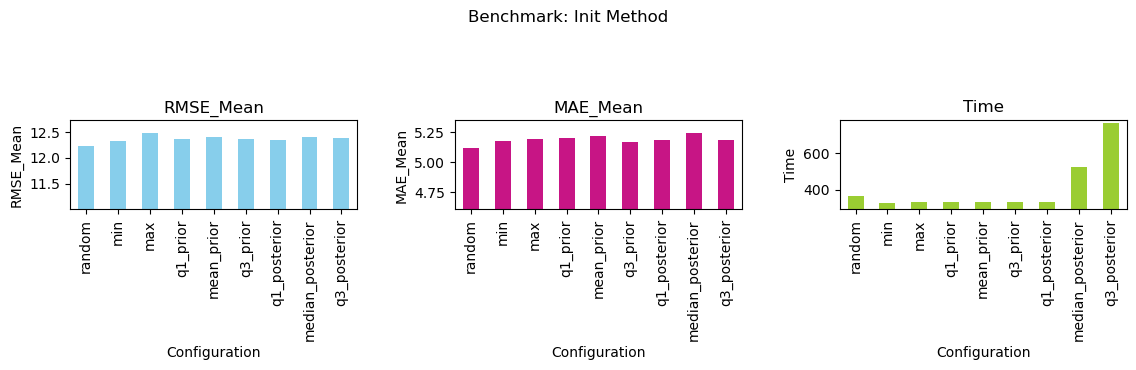

In [14]:
visualize_categorical("init_method", "Benchmark: Init Method")